In [ ]:
from Code.gan import *

In [ ]:
import torch
import torch.distributions as D
g = D.Independent(D.Normal(torch.tensor([-1.0,1.0]), torch.tensor([0.25,0.25])),0)
w = D.Categorical(torch.ones(2)/2)
gmm = D.MixtureSameFamily(w,g)
print(g)

s = torch.zeros(10000)
for x in range(10000):
    #if x%10 == 0:
    #    print(x)
    s[x] = gmm.sample()
#import pandas as pd
#pd.DataFrame(s).plot(kind='density')

#import matplotlib.pyplot as plt
#plt.hist(s,30)
#plt.show()

#s = gmm.rsample(torch.Size([100]))
#import matplotlib.pyplot as plt
#plt.plot([])
#plt.show()

/tmp/ipykernel_2443/1802531482.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weight = D.Categorical(torch.tensor(weight))


MixtureSameFamily(
  Categorical(probs: torch.Size([3]), logits: torch.Size([3])),
  Independent(MultivariateNormal(loc: torch.Size([3, 2]), covariance_matrix: torch.Size([3, 2, 2])), 0))
tensor([1.0871, 0.0135])
torch.Size([30000])
torch.Size([30000])
tensor([0.0632, 0.0809, 0.1346,  ..., 0.1429, 0.0477, 0.1278])


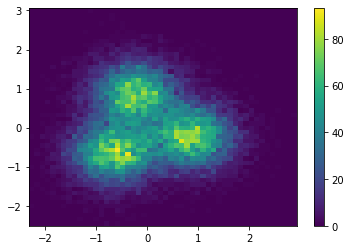

In [132]:
from Code.simplex import simplex_params
import torch
import torch.distributions as D

disc_dim = 2
mu, sigma, weight = simplex_params(2)
weight = torch.ones(3)
gaus = D.Independent(D.MultivariateNormal(torch.tensor(mu),torch.tensor(sigma)),0)
weight = D.Categorical(torch.tensor(weight))

gausMixture = D.MixtureSameFamily(weight,gaus)

print(gausMixture)
print(gausMixture.sample())

s = torch.zeros(30000,2)
for x in  range(30000):
    s[x] = gausMixture.sample()

print(s[:,0].shape)
print(gausMixture.log_prob(s).shape)
print(torch.exp(gausMixture.log_prob(s)))
import matplotlib.pyplot as plt
#h =plt.hist2d([1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],bins = 20)
h =plt.hist2d(s[:,0].numpy(),s[:,1].numpy(),bins = 50)
plt.colorbar(h[3])

In [133]:
gaus.variance

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500],
        [0.2500, 0.2500]])

In [71]:
np.array([0.86,-0.25]).dtype

dtype('float64')

In [79]:
torch.FloatTensor([1])

tensor([1.])

In [93]:
from scipy import optimize
#minimum = optimize.fmin(lambda x:(-torch.exp(gausMixture.log_prob(torch.FloatTensor(x))) ) .numpy().astype(np.float), 
            #np.array([0.86,-0.25],dtype =np.float),maxiter = 100)
xopt, fopt, iter, funcalls, warnflag = optimize.fmin(lambda x:(-torch.exp(gausMixture.log_prob(torch.FloatTensor(x))) ), 
            torch.FloatTensor([0.86,-0.25]),maxiter = 100,full_output=True)
print("----")
print(xopt, fopt, iter, funcalls, warnflag)


Optimization terminated successfully.
         Current function value: -1.061033
         Iterations: 21
         Function evaluations: 42
----
[ 0.86391485 -0.23153312] -1.061033010482788 21 42 0


In [47]:
s[0]
print(torch.exp(gausMixture.log_prob(torch.tensor([0.85,-0.25]))))
print(torch.exp(gausMixture.log_prob(torch.tensor([-0.25,0.85]))))
print(torch.exp(gausMixture.log_prob(torch.tensor([1.5,1.5]))))
print(torch.exp(gausMixture.log_prob(torch.tensor([-1.5,-1.5]))))


tensor(1.0554)
tensor(1.0554)
tensor(3.5425e-15)
tensor(3.0792e-07)


Independent(Normal(loc: torch.Size([2]), scale: torch.Size([2])), 0)


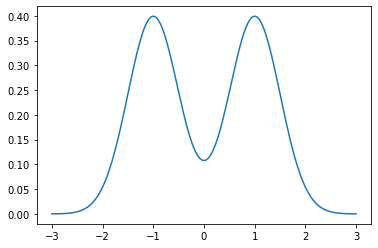

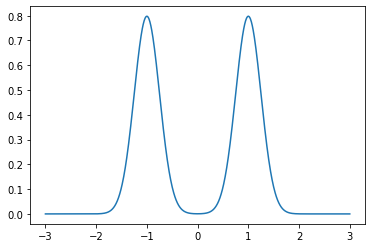

In [126]:
import torch
import torch.distributions as D
g = D.Independent(D.Normal(torch.tensor([-1.0,1.0]), torch.tensor([0.5,0.5])),0)
w = D.Categorical(torch.ones(2)/2)
gmm = D.MixtureSameFamily(w,g)
print(g)
x = torch.linspace(-3,3,1000)
import matplotlib.pyplot as plt
import numpy as np
mymix = lambda x: ((np.exp(-1/2/0.25**2*(x-1)**2  ))/(2*np.pi*0.25**2)**0.5 + (np.exp(-1/2/0.25**2*(x+1)**2))/(2*np.pi*0.25**2)**0.5  )/2
plt.plot(x,torch.exp(gmm.log_prob(x)))
plt.show()
plt.plot(x,mymix(x))
plt.show()


In [68]:
from scipy import optimize
minimum = optimize.fmin(lambda x:-torch.exp(gmm.log_prob(torch.tensor(x))), 1,maxiter = 100)

Optimization terminated successfully.
         Current function value: -0.797885
         Iterations: 10
         Function evaluations: 20


In [131]:
import torch
import torch.distributions as D
from scipy import optimize
from Code.simplex import simplex_params

for disc_dimension in range(2,10):
    sigma_scale = 0.25

    mu, sigma, weight = simplex_params(disc_dimension)
    # default sigma is independent and of scale 0.25, let it be smaller
    #print(mu,sigma,weight)
    gaus = D.Independent(D.MultivariateNormal(torch.tensor(mu),torch.tensor(sigma/0.25*sigma_scale)),0)
    c_weight = D.Categorical(torch.tensor(weight))
    gausMixture = D.MixtureSameFamily(c_weight,gaus)
    # the max of pdf should be close to one of the modes, i.e. use that as a starter point to optimize

    #_xopt , fopt, _iter, _funcalls, _warnflag = optimize.fmin(lambda x:(-torch.exp(self.gausMixture.log_prob(x)) ), 
    #    self.mu[0,:].detach().clone(),maxiter = 100,full_output=True) 
    _xopt , fopt, _iter, _funcalls, _warnflag = optimize.fmin(lambda x:(-gausMixture.log_prob(torch.FloatTensor(x)) ), 
        torch.FloatTensor(mu[0,:]),maxiter = 2000,full_output=True) 
    print("---------- ",disc_dimension," ----------")
    print(mu[0,:],gausMixture.log_prob(torch.FloatTensor(mu[0,:])),torch.exp(gausMixture.log_prob(torch.FloatTensor(mu[0,:]))))
    print(_xopt,gausMixture.log_prob(torch.FloatTensor(_xopt)),torch.exp(gausMixture.log_prob(torch.FloatTensor(_xopt))))
    print(fopt)

Optimization terminated successfully.
         Current function value: 1.532797
         Iterations: 25
         Function evaluations: 47
----------  2  ----------
[ 0.8639503  -0.23149478] tensor(-1.5339) tensor(0.2157)
[ 0.84003298 -0.22532204] tensor(-1.5328) tensor(0.2159)
1.53279709815979
Optimization terminated successfully.
         Current function value: 2.011854
         Iterations: 38
         Function evaluations: 77
----------  3  ----------
[ 0.8524113  -0.17048226 -0.17048226] tensor(-2.0190) tensor(0.1328)
[ 0.78420993 -0.15690212 -0.15683936] tensor(-2.0119) tensor(0.1337)
2.0118541717529297
Optimization terminated successfully.
         Current function value: 2.424254
         Iterations: 74
         Function evaluations: 143
----------  4  ----------
[ 0.86279607 -0.13835578 -0.13835578 -0.13835578] tensor(-2.4425) tensor(0.0869)
[ 0.73999727 -0.1188791  -0.11872314 -0.11881084] tensor(-2.4243) tensor(0.0885)
2.4242544174194336
Optimization terminated successfully.
